# 利用數值微分方法，找到函數的微分 (偏微分) 解
## df(x) / dx = lim h-> 0 (f(x+h) - f(x)) / h

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.utils import np_utils

%matplotlib inline

!pip install -q tqdm 

Using TensorFlow backend.


## 一個簡單的方程式
$ f(x) = 0.01x^2 + 0.1x $

In [2]:
# Define a target function
def my_function(x):
    # y = 0.01x^2 + 0.1x
    return 0.01*x**2 + 0.1*x

In [3]:
def numerical_diff(f, x):
    h = 1e-4
    return ( f(x+h) - f(x-h) ) / (2 * h)

print(numerical_diff(my_function, 5))
print(numerical_diff(my_function, 10))

0.1999999999990898
0.2999999999986347


# 梯度
### To visualize the curve: https://goo.gl/iXTXGc
$ x0^2 + x1^2 $

In [118]:
#@title  { run: "auto", vertical-output: true }
def func(x):
    return np.sum(x**2)  # x[0]**2 + x[1]**2 + x[2]**2...
    
    
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  #save back
        
    return grad


def numerical_gradient(f, X):
    
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

print(numerical_gradient(func, np.array([3.0, 4.0])))
print(numerical_gradient(func, np.array([-5.0, -5.0])))
print(numerical_gradient(func, np.array([0.0, 0.0])))
#batch 
print(numerical_gradient(func, np.array([[3.0, 4.0],[-5.0, -5.0],[0.0, 0.0]])))

[6. 8.]
[-10. -10.]
[0. 0.]
[[  6.   8.]
 [-10. -10.]
 [  0.   0.]]


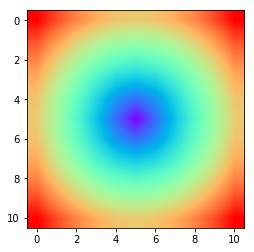

In [121]:
#@title 把每一個格子點的微分結果 (梯度) 用迴圈方式算出 { run: "auto", vertical-output: true }
example_grad = np.zeros((11,11))
for i in np.arange(-5,6):
    for j in np.arange(-5,6):
        x_vec, y_vec = numerical_gradient(func, np.array([np.float64(i), np.float64(j)]))
        net_vec = np.sqrt(x_vec**2 + y_vec**2)
        example_grad[i+5,j+5] = net_vec
plt.imshow(example_grad, cmap = 'rainbow', interpolation='bilinear')


In [122]:
example_grad.shape

(11, 11)

In [124]:

x0 = np.arange(-5, 6, 1)
x1 = np.arange(-5, 6, 1)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
np.float32(X)

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5., -5., -4.,
       -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5., -5., -4., -3., -2.,
       -1.,  0.,  1.,  2.,  3.,  4.,  5., -5., -4., -3., -2., -1.,  0.,
        1.,  2.,  3.,  4.,  5., -5., -4., -3., -2., -1.,  0.,  1.,  2.,
        3.,  4.,  5., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,
        5., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5., -5.,
       -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5., -5., -4., -3.,
       -2., -1.,  0.,  1.,  2.,  3.,  4.,  5., -5., -4., -3., -2., -1.,
        0.,  1.,  2.,  3.,  4.,  5., -5., -4., -3., -2., -1.,  0.,  1.,
        2.,  3.,  4.,  5.], dtype=float32)

In [110]:
Y = Y.flatten()
np.float32(Y)

array([-5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -4., -4.,
       -4., -4., -4., -4., -4., -4., -4., -4., -4., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.], dtype=float32)

In [107]:
b=np.array([np.float32(X), np.float32(Y)])
b.ndim

2

In [112]:
np.sum(2*np.float32(X)+2*np.float32(Y))

0.0

## Plot a 2D field of arrows.

    https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.quiver.html
    #quiver([X, Y], U, V, [C], **kw)
    [X, Y]: The x and y coordinates of the arrow locations.
    U, V: The x and y direction components of the arrow vectors.
    angles : 'xy': Arrows point from (x,y) to (x+u, y+v). Use this for plotting a gradient field



[[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10. -10.  -8.  -6.
   -4.  -2.   0.   2.   4.   6.   8.  10. -10.  -8.  -6.  -4.  -2.   0.
    2.   4.   6.   8.  10. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.
    8.  10. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10. -10.
   -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10. -10.  -8.  -6.  -4.
   -2.   0.   2.   4.   6.   8.  10. -10.  -8.  -6.  -4.  -2.   0.   2.
    4.   6.   8.  10. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.
   10. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10. -10.  -8.
   -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
 [-10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.  -8.  -8.  -8.
   -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.  -6.  -6.  -6.  -6.  -6.  -6.
   -6.  -6.  -6.  -6.  -6.  -4.  -4.  -4.  -4.  -4.  -4.  -4.  -4.  -4.
   -4.  -4.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.   2.   2.   2.
    2.   2.   2.

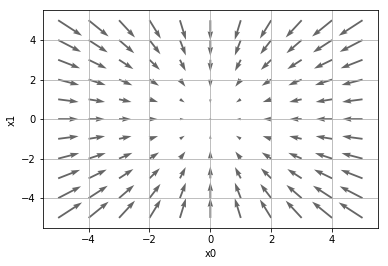

In [127]:

x0 = np.arange(-5, 6)
x1 = np.arange(-5, 6)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

gradients = numerical_gradient(func, np.array([np.float64(X), np.float64(Y)]))
#gradients = numerical_gradient(func, np.array([X,Y]))
print(gradients)

plt.figure()


plt.quiver(X, Y, -gradients[0], -gradients[1],  angles="xy",color="#666666")

plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
#plt.legend()
plt.draw()
plt.show()

In [128]:
gradients[0]

array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,
       -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,
       -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,
       -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,
       -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,
       -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,
       -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,
       -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,
       -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,
       -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,
       -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.])

# Define two layers network

In [9]:
import os,sys
sys.path.append(os.path.abspath('../common')) #for import common.utility
from activation import *

In [32]:
class Two_layerNet:
    def __init__(self, 
                 input_size, 
                 hidden_size, 
                 output_size, 
                 weight_init_std = 0.01):
        self.params = {}
        self.params['w1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['w2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def load_weight(self):

        with open('model.pickle', 'rb') as f:
            self.params = pickle.load(f)
        
    def save_weight(self):
        with open('model.pickle', 'wb') as f:
            pickle.dump(self.params, f)
        
    def predict(self, x):
        #the output is by softmax (the probability for each result)
        # forward
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, w1) + b1
        z1 = sigmoid(a1)
        
        a2 = np.dot(z1, w2) + b2
        y = softmax(a2)
        return y
    def predict_class(self, x):
        y_pred = self.predict(x)
        return y_pred.argmax(axis = 1) 
        
    def loss(self, x, y_true):
        y_pred = self.predict(x)
        return cross_entropy(y_pred, y_true)
    
    def compute_acc(self, x, y_true):
        y_pred = self.predict(x)
        # take argmax
        y_pred = y_pred.argmax(axis = 1) 
        y_true = y_true.argmax(axis = 1)
        
        acc = np.sum(y_pred == y_true) / len(y_true)
        return acc
    
    def numerical_gradient(self, x, y_true):
        loss_W = lambda w: self.loss(x, y_true)
        #print('gradient')
        #print(y_true.shape)
        
        grads = {}
        grads['w1'] = numerical_gradient(loss_W, self.params['w1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['w2'] = numerical_gradient(loss_W, self.params['w2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

## load MNIST dataset
    from sklearn.model_selecting import train_test_spilt()
    参数stratify： 依据标签y，按原数据y中各类比例，分配给train和test，使得train和test中各类数据的比例与原数据集一样。
    A:B:C=1:2:3
    split后，train和test中，都是A:B:C=1:2:3
    将stratify=X就是按照X中的比例分配
    将stratify=y就是按照y中的比例分配
    一般都是=y


In [11]:
#@title 使用 Tensorflow MNIST Dataset? { run: "auto", vertical-output: true }


large_mnist =True #@param ["False", "True"] {type:"raw"}

if large_mnist:
# Load data from tensorflow MNIST dataset, which image size is 28 x 28 
    from keras.datasets import mnist
    num_samples=2000 #only take first 2000 samples from 60000 
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train=x_train[:num_samples]
    y_train=y_train[:num_samples]
    x_test=x_test[:num_samples]
    y_test=y_test[:num_samples]
    x_train = x_train.reshape(num_samples, 784)
    x_test = x_test.reshape(num_samples, 784)    
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # Normalization: 0-1
    x_train /= 255
    x_test /= 255

    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)


else:
    # Load data from sklearn MNIST (digit) dataset, which image size is 8 x 8, pixel value 0~1
    from sklearn.datasets import load_digits
    digits = load_digits()
    x_, y_single = digits.data, digits.target

    # do some data preprocessing
    y_ = np.zeros((len(y_single), 10))
    y_[np.arange(len(y_)), y_single] = 1
    from sklearn.model_selection import train_test_split
    x_ = x_ / x_.max() # normailze it to 0 ~ 1
    # do train_test split
    x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size = 0.1, stratify = y_)


print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape) 
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (2000, 784)
y_train shape: (2000, 10)
x_test shape: (2000, 784)
y_test shape: (2000, 10)


## create the model

In [12]:
input_size=x_train.shape[-1]
input_size

784

In [13]:
network = Two_layerNet(input_size=x_train.shape[-1], # 784 for MNIST, 64 for digit
                       hidden_size=25, 
                       output_size=10)

## train the model

In [14]:
iters_num = 5000
train_size = x_train.shape[0] # numbers of training samples
bz = 100 # batch size
lr = 0.1 # learning rate
# define training settings ------------
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [15]:
for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, bz)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, y_batch) # already contain a feed-forward processing in this step
    
    for key in ("w1", "b1", "w2", "b2"):
        network.params[key] -= lr * grad[key]
        
    this_loss = network.loss(x_batch, y_batch)
    train_loss_list.append(this_loss)
    
    if i % 100 == 0:
        # compute accuracy for every 50 updates
        train_acc = network.compute_acc(x_train, y_train)
        test_acc = network.compute_acc(x_test, y_test)
        
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        #print("Train accuarcy, Test accuracy | " + str(train_acc) + ", " + str(test_acc))
        


100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [9:31:23<00:00,  6.83s/it]


## save the model

In [18]:
#network.params

{'w1': array([[-0.01018174,  0.00500095, -0.0205939 , ..., -0.00950139,
          0.00202977,  0.011564  ],
        [ 0.01331306,  0.00161339, -0.00444825, ..., -0.01030859,
         -0.0027914 , -0.02836887],
        [-0.01436026, -0.01371096,  0.01596589, ...,  0.00362836,
          0.00611419,  0.00520865],
        ...,
        [-0.00260012,  0.00723648,  0.01074171, ..., -0.01613992,
         -0.00199818, -0.00059662],
        [ 0.00667247, -0.00176886, -0.00721152, ...,  0.00489335,
          0.00596428, -0.01032513],
        [ 0.00937113,  0.00726988,  0.01853727, ..., -0.00995265,
         -0.0099486 ,  0.00233027]]),
 'b1': array([-0.24564435, -0.23098914, -0.19123958,  0.2386657 ,  0.43479099,
         0.06578351,  0.06842556, -0.0343935 , -0.40290159, -0.02623531,
         0.14316376,  0.06391717,  0.01365674,  0.23221346,  0.15396897,
         0.17752704,  0.02072955,  0.1412489 ,  0.26987283, -0.02413405,
         0.18516899, -0.17746967, -0.1292343 ,  0.34245331,  0.005876

In [17]:
network.save_weight()  #model.pickle

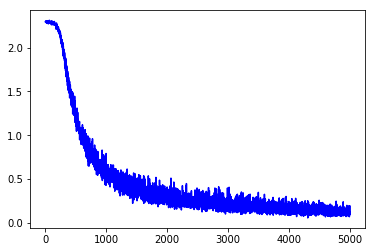

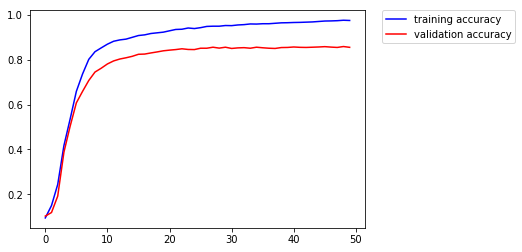

In [19]:
plt.plot(np.arange(len(train_loss_list)), train_loss_list, 'b-')
plt.show()

plt.plot(np.arange(len(train_acc_list)), train_acc_list, 'b-', label = 'training accuracy')
plt.plot(np.arange(len(test_acc_list)), test_acc_list, 'r-', label = 'validation accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [25]:
network.compute_acc(x_train,y_train)

0.977

In [39]:
network1.compute_acc(x_test,y_test)

0.8555

In [20]:
ypred=network.predict(x_train[:5])
ypred

array([[2.95345051e-02, 2.10314036e-04, 4.43066418e-04, 3.37617406e-01,
        1.59347997e-05, 6.25102769e-01, 4.88387773e-05, 1.92171804e-03,
        3.00529610e-03, 2.10015250e-03],
       [9.93251610e-01, 2.59840412e-07, 1.48323183e-04, 2.19755597e-04,
        2.82268311e-06, 6.16226294e-03, 2.69972903e-05, 1.15874086e-04,
        4.96764414e-05, 2.24182239e-05],
       [7.51026195e-06, 1.87255304e-05, 2.23258052e-03, 8.12536012e-04,
        9.94692144e-01, 2.50171944e-05, 3.51709638e-04, 5.40054381e-04,
        1.39919871e-05, 1.30573078e-03],
       [1.80559956e-07, 9.91216093e-01, 5.93046621e-03, 4.79861030e-04,
        1.04395607e-04, 1.56609618e-04, 3.45625148e-04, 4.80256070e-04,
        1.25491331e-03, 3.15990872e-05],
       [5.55375318e-07, 1.64415239e-03, 1.39746789e-05, 3.71791205e-05,
        1.64689271e-02, 3.84134975e-04, 3.94560339e-05, 1.11621265e-02,
        2.11266041e-03, 9.68136833e-01]])

In [21]:
network.predict_class(x_train[:20])

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=int64)

In [23]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Load pre-trained model

In [35]:
network1 = Two_layerNet(input_size=x_train.shape[-1], # 784 for MNIST, 64 for digit
                       hidden_size=25, 
                       output_size=10)
network1.load_weight()

In [37]:
network1.compute_acc(x_train,y_train)

0.977

In [38]:
network1.compute_acc(x_test,y_test)

0.8555